In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 다양한 종류의 상관계수
![](https://github.com/ljg-95/bigdataset1/blob/master/KakaoTalk_20200724_105514045.png?raw=true)

# 회귀분석
* 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법

* 한편, 회귀분석은 (상관분석 + 예측)하는 통계적 기법수량형 값을 예측하는데 주로 사용되는 통계적 모형

  + 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고독립변수가 주어지면 종속변수의 값이 얼마인지 추정

  + 독립변수와 종속변수 사이의 관계를선형방정식으로 나타낸 것을 회귀방정식이라 함
  $$\hat{y} = a + bx + \epsilon$$

a = 절편 : mean() - 기울기*mean()  
b = 기울기 : cor() * (sd()/sd())

# 회귀분석으로 알수 있는 것
* 모형적합도 ; 모형이 데이터에 얼마나 잘 맞는가?
  + 광고비와 매출액의 관계가 데이터에 잘 맞는 지 검증할 수 있음
+ 회귀계수 : 독립변수와 변화가 종속변수를 얼마나 변화시키는가? 
  + 광고비가 증가하면 매출액은 얼마나 증가할지 예상할 수 있음


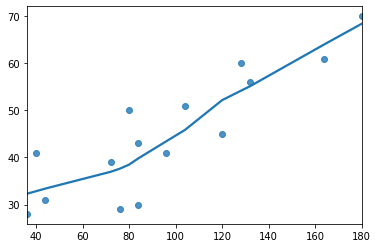

In [2]:
# 회귀분석 사전진단
# 독립변수와 종속변수간의 선형관계 존재 유무 확인
# seaborn의 regplot 함수를 이용해서 선형과계를 시각화해 봄
p = [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
s = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]

sns.regplot(p,s,lowess=True)



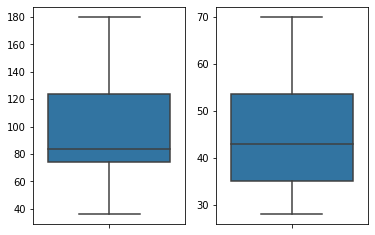

In [3]:
# 정규성여부1
f,(ax1,ax2) = plt.subplots(1,2)
sns.boxplot(p,ax=ax1,orient='v')
sns.boxplot(s,ax=ax2,orient='v')

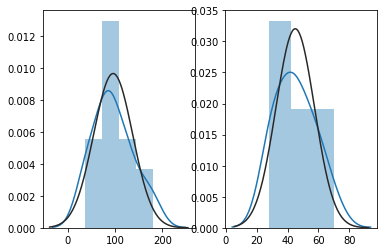

In [4]:
# 정규성여부2
f,(ax1,ax2) = plt.subplots(1,2)
sns.distplot(p,ax=ax1,fit=stats.norm)
sns.distplot(s,ax=ax2,fit=stats.norm)

# 왜도와 첨도
* 데이터의 분포형태와 대칭정도를 알아보기 위해 사용

* 왜도 : 데이터가 치우쳐 있는 정도를 나타내는 수치
  + 0보다 크면 오른쪽으로 치우친 형태(오른쪽으로 꼬리가 긴 형태)
* 첨도 : 데이터가 밀집되어 있는 정도를 나타내는 수치
  + 0보다 크면 뾰족한 형태
* scipy의 skew, kurtosis 함수를 사용함


In [5]:
print(stats.skew(p))
print(stats.skew(s))
print(stats.kurtosis(p))
print(stats.kurtosis(s))

0.4153774638807455
0.320666263042331
-0.5981718750000002
-0.8838325438480403


In [6]:
# 회귀분석 실시
# statsmodel 패키지의 ols 함수로 분석함
from statsmodels.formula.api import ols

# ex) 판촉전화횟수와 판매량 사이의 관계를
# 최소제곱법을 이용해서 선형방정식으로 표현하고,
# 판촉전화를 100회 시행시 추정되는 판매량은 
# 얼마인가?
phone = [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
sales = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]
# 회귀분석을 위한 식 : 종속변수 ~ 독립변수 => ols('종속변수 ~ 독립변수')
df = pd.DataFrame({'phone':phone,'sales':sales})
result = ols('sales~phone',data=df).fit()
print(result.summary())

# 분석결과
# 결정계수 : 0.748 => 회귀모형이 나름의 의미를 갖고 있다(개선필요) => 보통은 0.85 이상은 되어야 써먹을 수 있음
# 회귀계수 유의성 : 0.001/0.00 => 회귀계수들이 유의미함
# 회귀계수(기울기/절편) : 0.2606/19.98
# 회귀식 : y = 0.26*x + 19.98
# 회귀식의 기울기(0.26)의미  : 판촉전화 1회시 제품을 0.26대 팔 수 있음
# 회귀식의 절편(19.98)의미 : 판촉전화 0회시 제품을 19.98대 팔 수 있음???? => 예측에는 사용불가 수치
# 판촉전화 범위 : 최소 = 36, 최대 = 180

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     38.50
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           3.19e-05
Time:                        08:37:06   Log-Likelihood:                -48.788
No. Observations:                  15   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9800      4.390      4.552      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [7]:
# 회귀식을 이용해서 판촉전화 100회 시도시 예상 제품판매수는?
#  y = 0.26 * 100 + 19.98 => 약 46대 판매
y = 0.26 * 100 + 19.98
print(int(y))

y = 0.26 * 40 + 19.98
print(int(y))

y = 0.26 * 84 + 19.98
print(int(y))

45
30
41


# 회귀분석 결과 이해하기
* 전화횟수 대비 판매량에 대한 회귀식 : y = 19.17 + 0.261 * x
  * 전화횟수 96회와 104회에 대한 제품판매수 : 41, 51
  * 전화횟수 100회에 대한 예상 제품판매수 : 45
* 그런데, 전화횟수 40회에 대한 예상 제품판매수 : 30(실제:41)
* 또한, 전화횟수 84회에 대한 예상 제품판매수 : 41(실제:56,30) 
  + => 과연, 이 회귀식을 믿을 수 있을까

* 정확한 예측이란? - 정확한 결과를 도출하는 것
  + 경제학과 경영학을 포함한 모든 분야에서는 불가능한 것으로 알려져 있음
* 추정에 있어 추정치 x에 근거해서 얼마나 정확하게/부정확하게 예측했나등의 척도가 필요 -> 추정치의 표준오차
  + 추정치의 표준오차 작다 - 추정치가 잘 맞음
  + 추정치의 표준오차 크다 - 추정치가 잘 안 맞음

# 회귀분석 좀더 자세히 이해하기
* 결정계수$R^2$
  + 전체 변동에 대해 모델이 설명하는 변동의 비를 의미함
  + 즉, 설정한  회귀직선에 얼마나 값들이 밀집(분산)되어 있는지 알수있음
  + 종속변수의 분산을 독립변수가 얼마나 설명하고 있는지 알수있음
  + $R^2$값이 작으면 회귀직선 주위의 점들이 많이 흩어져 있음을 의미
* 수정된 결정계수 $R^2$
  + 수정된 결정계수는 기본적으로 결정계수와 같은 의미를 내포
  + 단, 독립변수의 계수가 많아지면 결정계쑤의 값이 커지는 경향이 생김
  + 독립변수의 개수와 표본의 크기를 고려해서 결정계수를 보정함
* $F$통계값
  + 회귀 모형에 대한 통계적 유의미성 검증 결과 의미
  + 자유도에 의해 조정된 변동과 그렇지 않는 변동의 비율을 나타낸것
  + 즉, 이 관계가 선형으로 볼수 있는지 여부를 의미
  + 회귀계수가 유의미한지를 판단
* 회귀계수 : 분석결과에서 intercept, coef 부분
* 회귀계수 유의성 여부 : 분석결과에서 p>|t| 부분


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     48.44
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           9.92e-06
Time:                        08:37:06   Log-Likelihood:                -46.146
No. Observations:                  15   AIC:                             96.29
Df Residuals:                      13   BIC:                             97.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9291      5.374     11.710      0.0

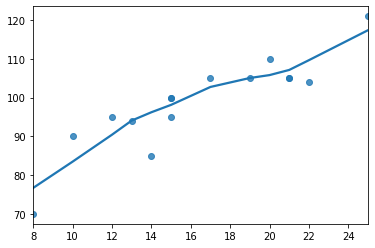

In [8]:
# 광고비와 매출액간의 상관관계가 있음을 파악했음
# 2016 광고비에 따른 매출액을 예상할 수있을지 회귀분석을 실시하세요
ad = [13,8,10,15,12,15,14,15,17,19,20,21,22,21,25]
sales = [94,70,90,100,95,100,85,95,105,105,110,105,104,105,121]

sns.regplot(ad,sales,lowess=True)

# 회귀계수와 회귀모형 구축
from statsmodels.formula.api import ols
df = pd.DataFrame({'ad':ad,'sales':sales})
result = ols('sales~AD
',data=df).fit()
print(result.summary())

# 회귀모델 분석
# 결정계수 : 0.788 
# F통계량 : 48.44
# 회귀계수 유의성 : 0.000/0.00
# 회귀계수 : 기울기=2.1865/절편=62.9291
# 회귀식 : y = 2.1865*x + 62.9291
# 회귀식의 기울기(2.1865)의미 : 광고비1당 매출액 2.1865 예상
# 광고비의 최대->25, 최소->8

# 회귀식을 이용한 매출액 예상 
y = 2.1865*8 + 62.9291
print(int(y))

y = 2.1865*25 + 62.9291
print(int(y))

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fba8f186cf8>>


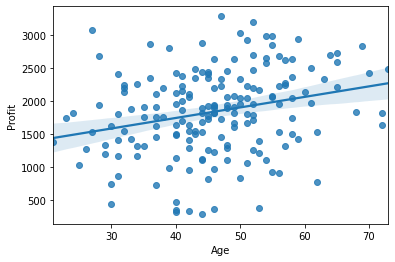

In [14]:
# applewood 데이터를 기초로 해서 구매자 연령과 판매이익간의 관계를 선형방정식으로 나타내시오
applewood = pd.read_csv('https://raw.githubusercontent.com/ljg-95/bigdataset1/master/applewood.csv',sep=',')
age = applewood['Age']
profit = applewood['Profit']

age =age.astype(int)
profit = profit.replace(',','', regex=True)
profit = profit.replace('\$','', regex=True)
profit = profit.astype(int)

sns.regplot(age, profit, lowess=False)

df = pd.DataFrame({'age':age, 'pf':profit})
result = ols('pf~ age', data=df).fit()
print(result.summary)



                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     8.302
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0164
Time:                        09:03:41   Log-Likelihood:                -27.013
No. Observations:                  12   AIC:                             58.03
Df Residuals:                      10   BIC:                             59.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8517      1.413      1.311      0.2

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


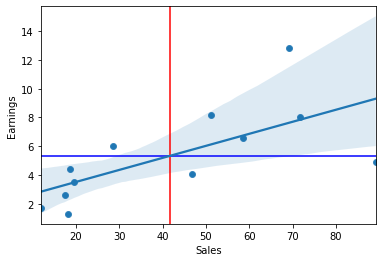

In [15]:
# ex) 최고의 중소기업 중 12개를 임의로 추출하여
# 매출액과 이익을 조사하였음 (smallbs.txt)
# 산점도를 그리고, 상관계수와 회귀방정식을 구해서
# 매출액이 50일때 이익금액을 추정하시오
sb = pd.read_csv('https://raw.githubusercontent.com/pureun-han/bigdataset/master/smallbs.txt', sep='\t')
s = sb['Sales']
e = sb['Earnings']
ms = np.mean(s)
me = np.mean(e)

plt.axvline(x=ms, color='r')
plt.axhline(y=me, color='b')
sns.scatterplot(s,e)

stats.pearsonr(s, e)
# => 0.06은 0.05보다 작으므로 유의수준 0.05수준에서 높은 상관을 가지고있다
sns.regplot(s,e,lowess=False)

df = pd.DataFrame({'s':s, 'e':e})
res = ols('e ~ s', data=df).fit()

print(res.summary())

# y = 1.8517 + (0.0836 * x)   # 0.016으로 회귀식 유의함

y = 1.8517+(0.0836*50)
print(int(y))

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.140
Method:                 Least Squares   F-statistic:                   0.01488
Date:                Fri, 24 Jul 2020   Prob (F-statistic):              0.906
Time:                        09:06:21   Log-Likelihood:                -16.688
No. Observations:                   9   AIC:                             37.38
Df Residuals:                       7   BIC:                             37.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9198      1.385      7.163      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


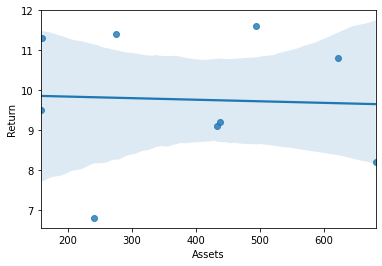

In [17]:
# ex) 뮤추얼펀드에 투자하기 위해 자산과 5년간
# 실적을 조사하였다. 9개의 뮤추얼펀드를 임의로
# 추출하여 자산가치와 수익율을 토대로 산점도를 
# 그리고, 상관계수와 회귀방정식을 구해서
# 펀드투자액이 4억일때 5년 수익율은? 
# (단위: 백만) (funds.txt)
funds = pd.read_csv('https://raw.githubusercontent.com/ljg-95/bigdataset1/master/funds.txt',sep='\t')

sns.regplot(funds['Assets'], funds['Return'])

# 그래프가 수평이라 분석할 의미가 없음

result = ols('Return ~ Assets',data=funds).fit()
print(result.summary())
# 회귀모델 분석
# 결정계수 : 0.002 
# F통계량 : 0.01488
# 회귀계수 유의수준 : (>0.0001/0.906)
# 회귀계수 : 기울기=-0.0004/절편=9.9198 
# 회귀식 : y = -0.0004*x + 9.9198


                            OLS Regression Results                            
Dep. Variable:                 Crimes   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     19.49
Date:                Fri, 24 Jul 2020   Prob (F-statistic):            0.00450
Time:                        09:12:17   Log-Likelihood:                -19.940
No. Observations:                   8   AIC:                             43.88
Df Residuals:                       6   BIC:                             44.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3882      4.143      7.093      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


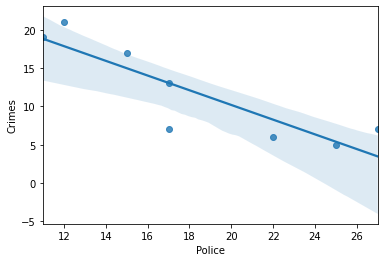

In [18]:
# ex) 시의회에서 범죄발생율을 낮추기 위해
# 경찰관을 늘리고자 함. 다른 시의 경찰관 수와
# 범죄발생건수를 토대로 산점도를 그리고, 
# 상관계수와 회귀방정식을 구해서 경찰관 수가
# 20일때 범죄발생율은? (citycrime.txt)
crime = pd.read_csv('https://raw.githubusercontent.com/ljg-95/bigdataset1/master/citycrime.txt',sep='\t')

sns.regplot(crime['Police'], crime['Crimes'])

result = ols('Crimes ~ Police',data=crime).fit()
print(result.summary())

# 회귀모델 분석
# 결정계수 :  0.765
# F통계량 : 19.49
# 회귀계수 유의수준 : (0.0001</0.004)
# 회귀계수 : 기울기=-0.9596/절편=29.3882
# 회귀식 : y = -0.9596*x + 29.3882

In [12]:
# ex) 중고차의 연령과 가격 사이의 관계를 알고자 함
# 작년에 판매된 중고차량 중 12대를 기반으로 
# 산점도를 그리고 상관계수와 회귀방정식을 구해서
# 중고차 연령이 12일때 중고차 가격은 얼마인가?
# (oldcars.txt)  
